In [19]:
import pandas as pd
import numpy as np

import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix_three'

/content/drive/My Drive/Colab Notebooks/dw_matrix_three


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [0]:
len(np.unique(y_train))

43

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
y_train.shape

(34799, 43)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 43)                2476843   
Total params: 2,478,635
Trainable params: 2,478,635
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train)

1088/1088 [==============================] - 5s 5ms/step - loss: 9.4728 - accuracy: 0.7811


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
                    
      Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

      Flatten(),

      Dense(num_classes, activation='softmax')

  ])

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose',1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks=[tensorboard_callback]
      )
  return model

In [8]:
model = get_cnn_v1(input_shape, num_classes)
trained_model = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 14.7547 - accuracy: 0.7589 - val_loss: 0.2759 - val_accuracy: 0.9337
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 0.2357 - accuracy: 0.9450 - val_loss: 0.1496 - val_accuracy: 0.9684
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1680 - accuracy: 0.9592 - val_loss: 0.1287 - val_accuracy: 0.9701
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1374 - accuracy: 0.9678 - val_loss: 0.0965 - val_accuracy: 0.9778
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1230 - accuracy: 0.9719 - val_loss: 0.0766 - val_accuracy: 0.9820


In [11]:
y_pred_probe = trained_model.predict(X_test)
y_pred_probe

array([[6.49500744e-13, 2.20103766e-06, 5.40655378e-07, ...,
        2.38810998e-08, 1.75006478e-03, 5.33419770e-05],
       [3.90336397e-14, 2.53602366e-07, 4.04392580e-07, ...,
        1.51593049e-08, 1.06684979e-06, 3.85118938e-07],
       [5.89814525e-12, 1.04898083e-06, 1.04005755e-06, ...,
        4.51603341e-08, 1.72816291e-01, 2.05200398e-04],
       ...,
       [6.39040489e-04, 4.60138079e-03, 1.61414326e-03, ...,
        1.67847302e-05, 4.26144397e-04, 2.72765290e-04],
       [1.14913137e-05, 9.24971711e-04, 5.02799812e-04, ...,
        8.08176446e-06, 1.93613535e-03, 1.02314356e-04],
       [2.05145934e-05, 1.36912207e-03, 4.43185796e-04, ...,
        5.14291014e-06, 6.89041044e-04, 3.43621941e-05]], dtype=float32)

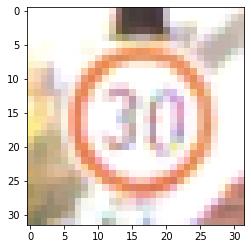

In [12]:
plt.imshow(X_test[400])

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [21]:
y_pred_probe[400]

array([7.5384061e-04, 1.2910283e-03, 1.6082770e-15, 6.1778763e-07,
       9.9795449e-01, 2.4579247e-08, 3.3030409e-24, 3.7007459e-21,
       9.9837508e-20, 1.5822721e-14, 8.8335054e-22, 2.1929056e-12,
       1.2722738e-26, 6.9349239e-15, 3.5352811e-20, 6.5246547e-38,
       4.1132949e-21, 2.8975785e-20, 1.8092086e-21, 1.5002899e-25,
       1.1241245e-24, 1.3908019e-23, 1.4026342e-32, 5.9126728e-20,
       2.5715523e-20, 9.4342002e-27, 1.3290703e-27, 1.9647077e-30,
       5.0677268e-13, 5.8327800e-22, 7.7471202e-32, 5.6193386e-27,
       1.1312709e-37, 5.1050539e-22, 3.6972096e-33, 9.5765247e-18,
       1.7666631e-38, 8.4905739e-27, 2.6712583e-28, 7.1058635e-28,
       2.0344579e-29, 5.8363289e-26, 3.5209224e-34], dtype=float32)

In [18]:
labels_dict[np.argmax(y_pred_probe[400])]

'Speed limit (70km/h)'

<BarContainer object of 43 artists>

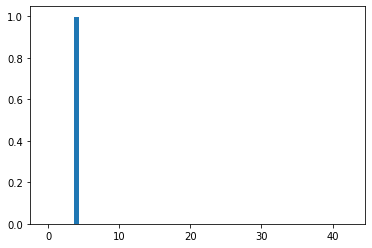

In [20]:
plt.bar(range(len(y_pred_probe[400])), y_pred_probe[400])

In [0]:
def predict(trained_model, X_test, y_test, scoring=accuracy_score):
  y_pred_probe = trained_model.predict(X_test)
  y_pred = np.argmax(y_pred_probe, axis=1)

  y_test_norm = np.argmax(y_test, axis=1)

  return scoring(y_test_norm, y_pred)

In [0]:
score = predict(trained_model, X_test, y_test)

In [27]:
score

0.8179138321995465

In [0]:
def train_and_predict(model):
  trained_model = train_model(model, X_train, y_train)

  return predict(trained_model, X_test, y_test)

In [0]:
# %tensorboard --logdir logs

In [35]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
                    
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Flatten(),

      Dense(1024, activation='relu'),
      Dropout(0.3),

      Dense(num_classes, activation='softmax')
  ])

train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 5.1687 - accuracy: 0.2838 - val_loss: 1.4939 - val_accuracy: 0.5922
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 1.2617 - accuracy: 0.6246 - val_loss: 0.4389 - val_accuracy: 0.8994
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.6134 - accuracy: 0.8176 - val_loss: 0.2359 - val_accuracy: 0.9452
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.3865 - accuracy: 0.8817 - val_loss: 0.1432 - val_accuracy: 0.9713
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2850 - accuracy: 0.9172 - val_loss: 0.0769 - val_accuracy: 0.9856


0.9242630385487528

In [36]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
                    
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
      Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Flatten(),

      Dense(1024, activation='relu'),
      Dropout(0.3),

      Dense(num_classes, activation='softmax')
  ])

train_and_predict(get_cnn_v3(input_shape, num_classes))


Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.1999 - accuracy: 0.5607 - val_loss: 0.2886 - val_accuracy: 0.9474
Epoch 2/5
272/272 [==============================] - 3s 13ms/step - loss: 0.4523 - accuracy: 0.8700 - val_loss: 0.0992 - val_accuracy: 0.9804
Epoch 3/5
272/272 [==============================] - 3s 13ms/step - loss: 0.2655 - accuracy: 0.9234 - val_loss: 0.0700 - val_accuracy: 0.9820
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1824 - accuracy: 0.9457 - val_loss: 0.0261 - val_accuracy: 0.9939
Epoch 5/5
272/272 [==============================] - 3s 13ms/step - loss: 0.1397 - accuracy: 0.9591 - val_loss: 0.0282 - val_accuracy: 0.9937


0.9693877551020408

In [49]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
                    
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Flatten(),

      Dense(1024, activation='relu'),
      Dropout(0.3),

      Dense(num_classes, activation='softmax')
  ])

train_and_predict(get_cnn_v4(input_shape, num_classes))


Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 2.2290 - accuracy: 0.3889 - val_loss: 0.5848 - val_accuracy: 0.8191
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.6300 - accuracy: 0.8094 - val_loss: 0.1409 - val_accuracy: 0.9610
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2920 - accuracy: 0.9122 - val_loss: 0.0557 - val_accuracy: 0.9844
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1938 - accuracy: 0.9429 - val_loss: 0.0308 - val_accuracy: 0.9916
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1404 - accuracy: 0.9596 - val_loss: 0.0262 - val_accuracy: 0.9925


0.9628117913832199

In [50]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
                    
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Flatten(),

      Dense(1024, activation='relu'),
      Dropout(0.3),

      Dense(1024, activation='relu'),
      Dropout(0.3),

      Dense(num_classes, activation='softmax')
  ])

train_and_predict(get_cnn_v5(input_shape, num_classes))


Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.4987 - accuracy: 0.3036 - val_loss: 1.0632 - val_accuracy: 0.6449
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.7935 - accuracy: 0.7478 - val_loss: 0.1819 - val_accuracy: 0.9474
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.3568 - accuracy: 0.8884 - val_loss: 0.1349 - val_accuracy: 0.9599
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2434 - accuracy: 0.9253 - val_loss: 0.0468 - val_accuracy: 0.9859
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1732 - accuracy: 0.9483 - val_loss: 0.0331 - val_accuracy: 0.9923


0.973015873015873

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)

In [59]:
model = get_cnn_v5((32,32,1), num_classes)
trained_model = train_model(model, X_train_gray, y_train)
predict(trained_model, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.5855 - accuracy: 0.2797 - val_loss: 0.7235 - val_accuracy: 0.7868
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.5620 - accuracy: 0.8220 - val_loss: 0.1187 - val_accuracy: 0.9634
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2516 - accuracy: 0.9213 - val_loss: 0.0597 - val_accuracy: 0.9833
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1789 - accuracy: 0.9440 - val_loss: 0.0459 - val_accuracy: 0.9862
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1345 - accuracy: 0.9584 - val_loss: 0.0257 - val_accuracy: 0.9927


0.9671201814058957

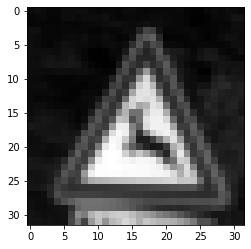

In [61]:
plt.imshow(color.rgb2gray(X_train[500]), cmap=plt.get_cmap('gray'))